## Principal Component Analysis 
 
This is a dimensionality reduction technique using projections. 

As already know as the dimensionality increases, the space increase and high chance of sparsity with the training data.  

Idea is that, most real world problems have patterns, correlation and they are not spread out uniformly in all dimensions. That they lies in a low dimensional subspace of the high dimensional space. 

Even if we remove some of these sparse dimension, we can retain most of the information.

PCA aims to preserve the information(variance) by projection. It transforms high-dimensional data into a lower-dimensional space by identifying the directions (principal components) that capture the maximum variance in the data.

Assumptions:
- Data is linearly correlated, and variance captures the important structure.
- Large variance corresponds to important patterns.
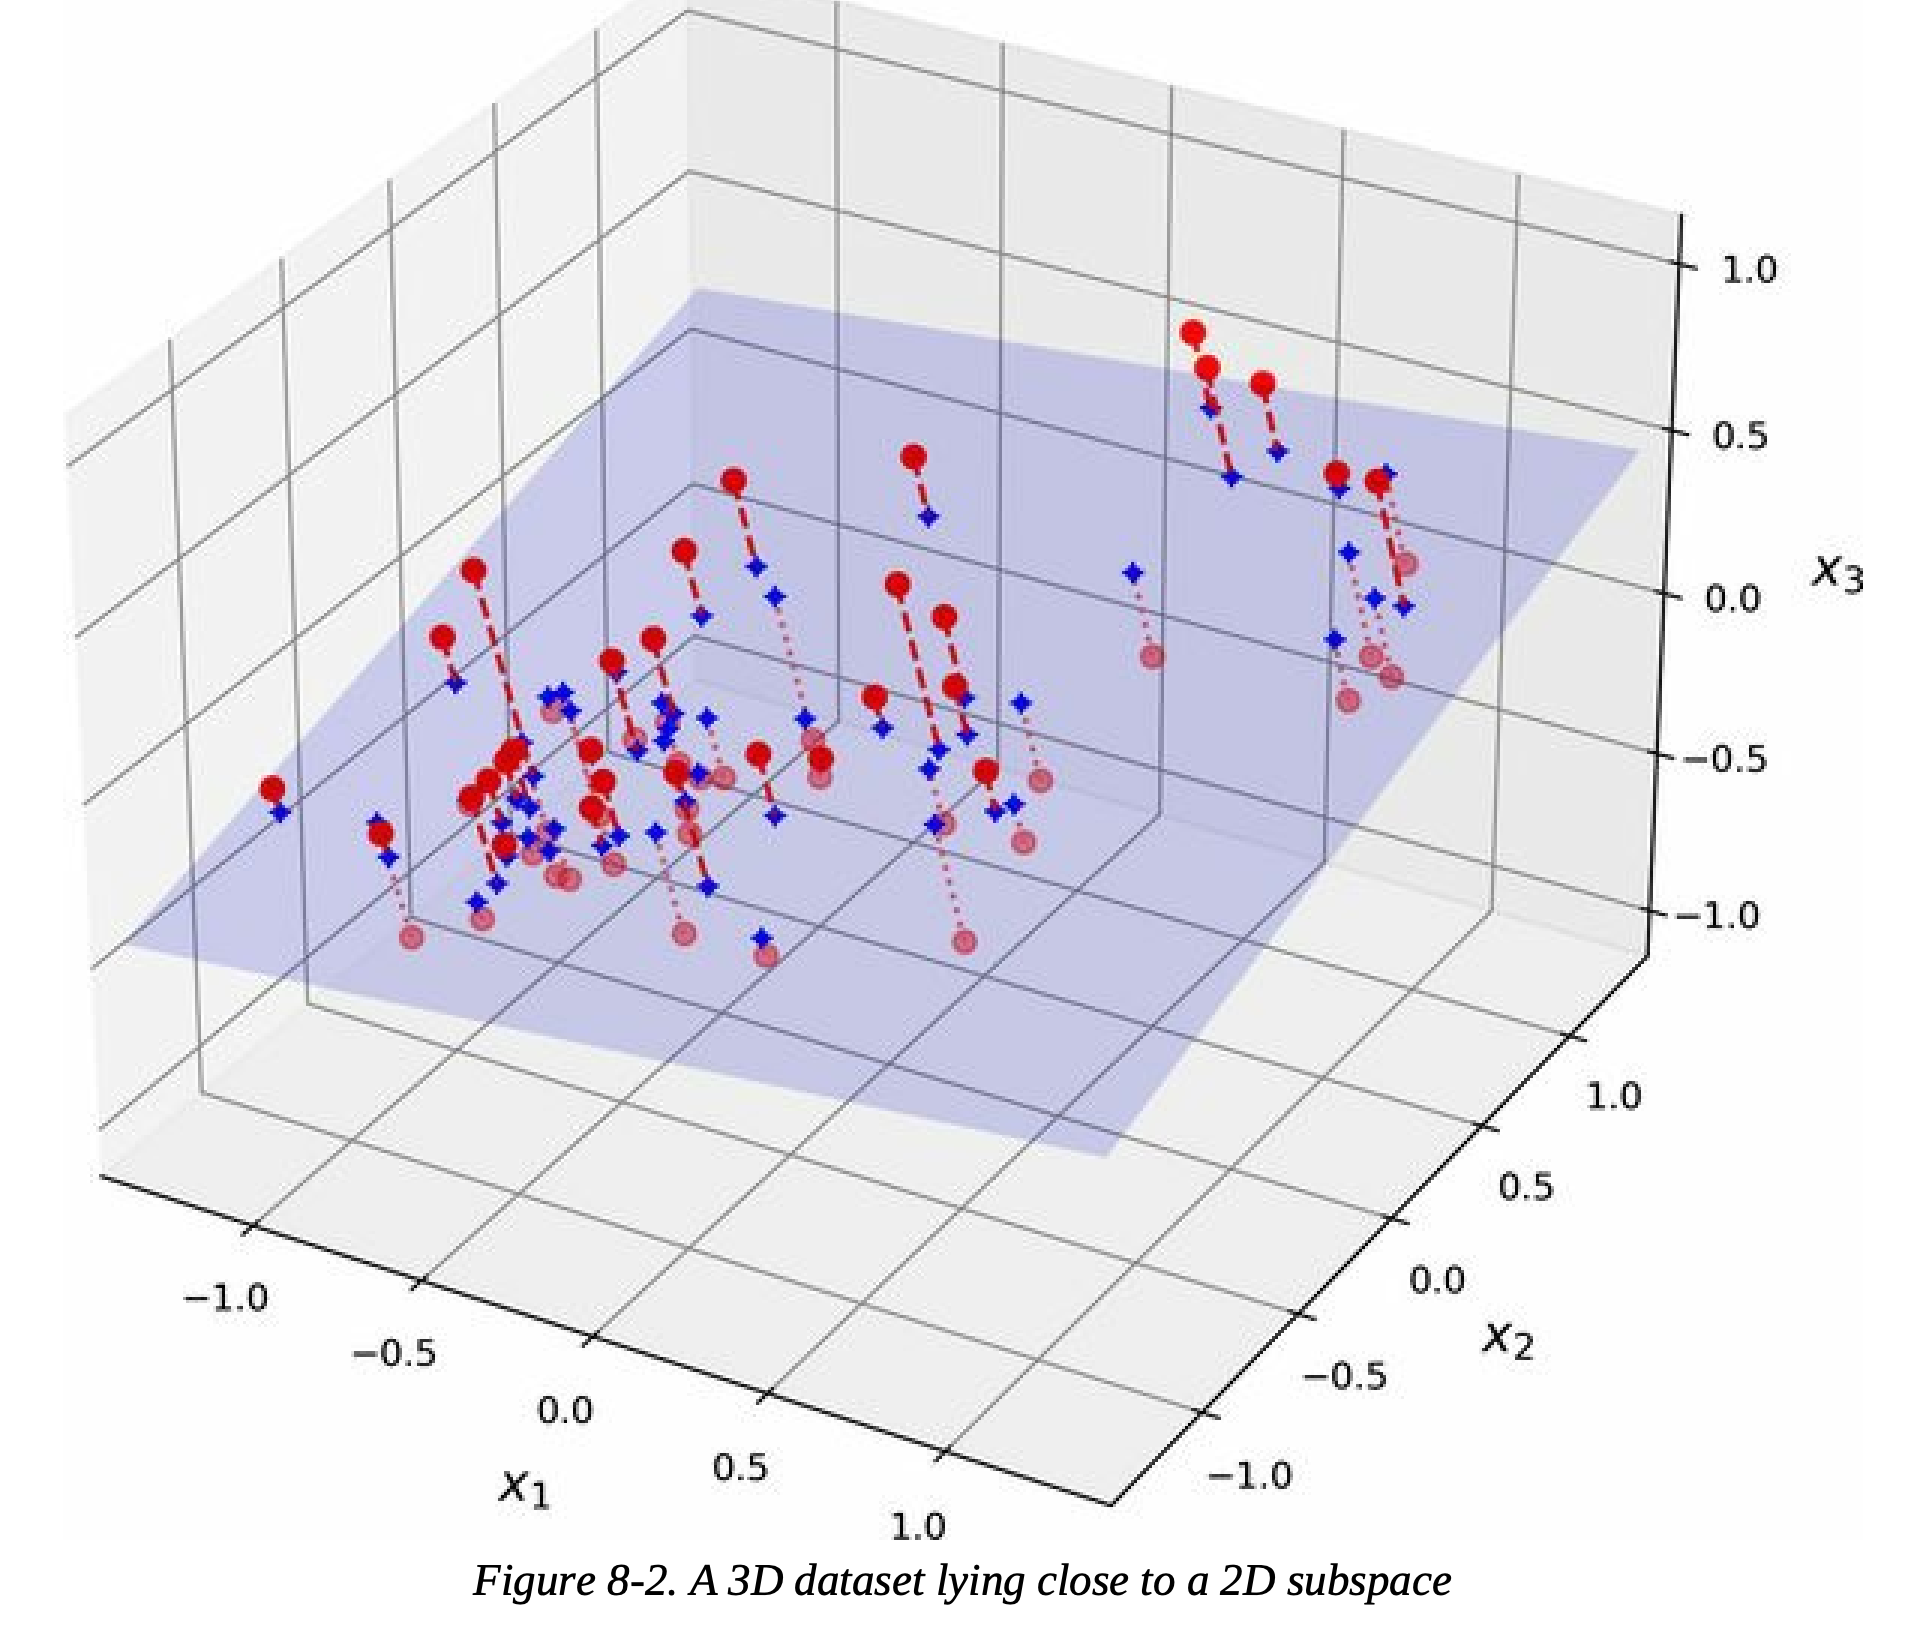

Principal components are 
- orthogonal axes(angle between any two axis is 90)
- it can be some linear transformation(additon of two axis, flipped axis, etc.) using existing axes.



Loading MNIST...
Data shape: (5000, 784)
Original shape: (5000, 784)
Transformed shape: (5000, 50)
Total variance explained: 0.8291341909331549

Sklearn total variance explained: 0.8291111876683033


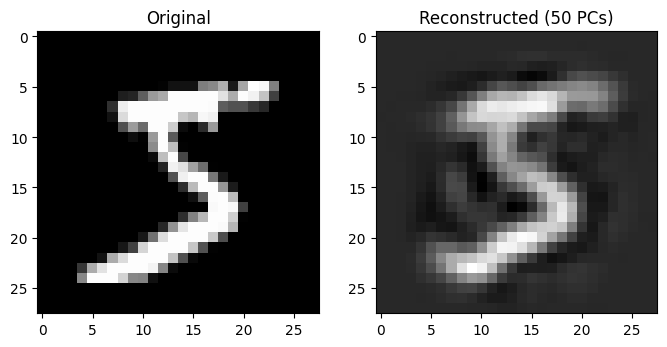

In [3]:
from pca_scratch import PCAScratch

from sklearn.decomposition import PCA
import numpy as np
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt

print("Loading MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data / 255.0  # scale to [0,1]
y = mnist.target.astype(int)

X_small = X[:5000]
print("Data shape:", X_small.shape)

pc1 = PCAScratch(n_components=50)
X_new = pc1.fit_transform(X_small)
print("Original shape:", X_small.shape)
print("Transformed shape:", X_new.shape)
print("Total variance explained:", np.sum(pc1.explained_variance_ratio_))

sk_pca = PCA(n_components=50)
X_pca_sk = sk_pca.fit_transform(X_small)
print("\nSklearn total variance explained:", np.sum(sk_pca.explained_variance_ratio_))

X_reconst = X_new @ pc1.components_ + pc1.mean_

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_small[0].reshape(28, 28), cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(X_reconst[0].reshape(28, 28), cmap='gray')
plt.title("Reconstructed (50 PCs)")

plt.show()

Original shape: (100, 2)


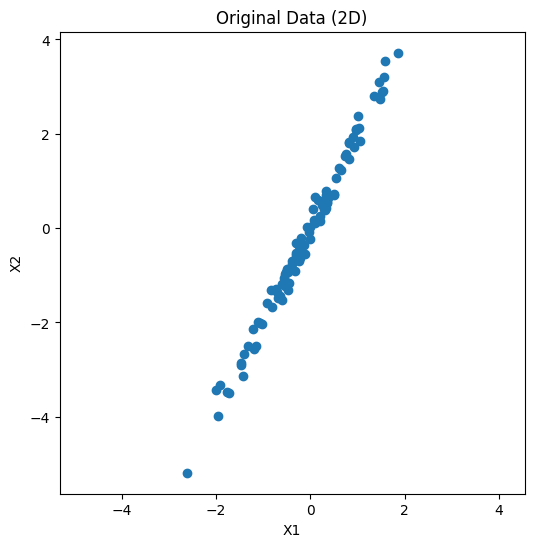

Transformed shape: (100, 1)


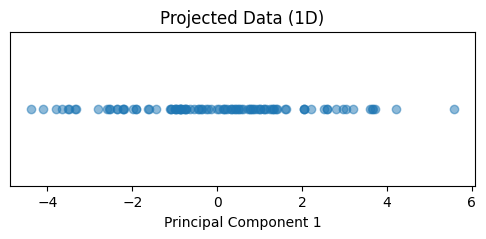

Principal components:
 [[-0.44921697 -0.8934227 ]]
Explained variance:
 [4.05844996]
Explained variance:
 [0.99821543]


In [5]:
np.random.seed(42)
n_samples = 100

# Generate X1
X1 = np.random.normal(0, 1, n_samples)
# Make X2 strongly correlated with X1 plus some noise
X2 = 2 * X1 + np.random.normal(0, 0.2, n_samples)

# Combine into a (n_samples, 2) matrix
X = np.column_stack((X1, X2))

print("Original shape:", X.shape)

# Visualize original data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original Data (2D)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.show()

# --- Use your PCA ---
pca = PCAScratch(n_components=1)
X_transformed = pca.fit_transform(X)

print("Transformed shape:", X_transformed.shape)

# Visualize the projection (should be 1D)
plt.figure(figsize=(6, 2))
plt.scatter(X_transformed, np.zeros_like(X_transformed), alpha=0.5)
plt.title("Projected Data (1D)")
plt.xlabel("Principal Component 1")
plt.yticks([])
plt.show()

print("Principal components:\n", pca.components_)
print("Explained variance:\n", pca.explained_variance_)
print("Explained variance:\n", pca.explained_variance_ratio_)
